In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\hp333\Desktop\supervised learning\class_data_2.csv')
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [56]:
from sklearn.preprocessing import LabelEncoder
y = np.array(df['class'])

le = LabelEncoder()
X = df.drop('class', axis=1)
df = df.apply(le.fit_transform)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,train_size=0.8, random_state=200)

In [58]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)

model.fit(x_train, y_train)


RandomForestClassifier()

In [59]:
ans_train = model.predict(x_train)
ans_test = model.predict(x_test)

In [60]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, ans_train)
accuracy_test = accuracy_score(y_test, ans_test)

accuracy_test, accuracy_test

(1.0, 1.0)

Text(0.5, 1.0, 'Confusion Matrix_test')

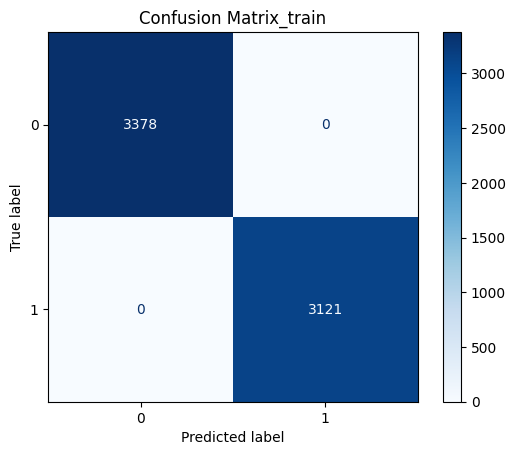

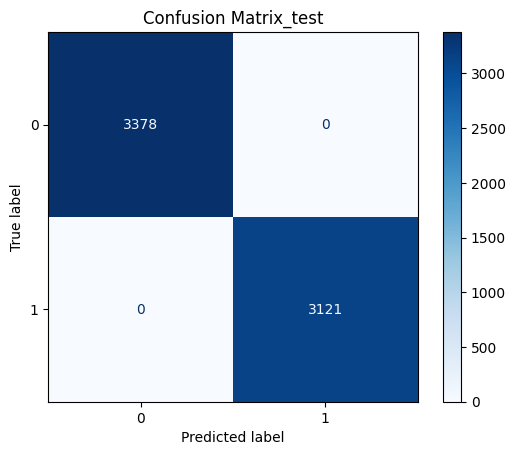

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, ans_train)
cm_test = confusion_matrix(y_test, ans_test)

disp_1 =  ConfusionMatrixDisplay(confusion_matrix= cm_train, display_labels=model.classes_)
disp_2 =  ConfusionMatrixDisplay(confusion_matrix= cm_train, display_labels=model.classes_)

disp_1.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix_train')

disp_2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix_test')